In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [3]:
df=pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [8]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [9]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [10]:
x_train['age_median']=x_train['Age'].fillna(median_age)
x_train['age_mean']=x_train['Age'].fillna(mean_age)


x_train['fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['fare_median']=x_train['Fare'].fillna(median_fare)


In [11]:
df.sample(5)

,Age,Fare,Family,Survived
643,NaN,56.4958,0,1
886,27.0,13.0000,0,0
284,NaN,26.0000,0,0
630,80.0,30.0000,0,1
415,NaN,8.0500,0,0


In [12]:
x_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_mean,fare_median
737,35.0,512.3292,0,35.0,35.0,512.3292,512.3292
188,40.0,15.5000,2,40.0,40.0,15.5000,15.5000
287,22.0,7.8958,0,22.0,22.0,7.8958,7.8958
480,9.0,46.9000,7,9.0,9.0,46.9000,46.9000
397,46.0,26.0000,0,46.0,46.0,26.0000,26.0000


In [13]:
print('variance original ofa age:',x_train['Age'].var())
print('age variance after median ',x_train['age_median'].var())
print('age variance after mean',x_train['age_mean'].var())

print('original variance of age',x_train['Fare'].var())
print('age variance after median',x_train['fare_median'].var())
print('age variance after mean',x_train['fare_mean'].var())

variance original ofa age: 204.34951339046142
age variance after median  161.98956633460548
age variance after mean 161.81262452718676
original variance of age 2448.1979137063163
age variance after median 2340.09102197536
age variance after mean 2324.2385256705534


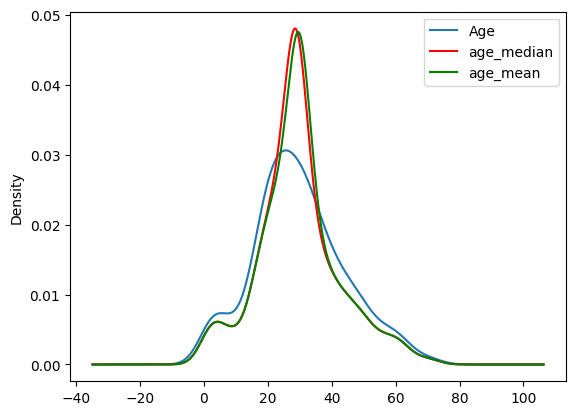

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)

x_train['age_median'].plot(kind='kde',ax=ax,color='red')
x_train['age_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

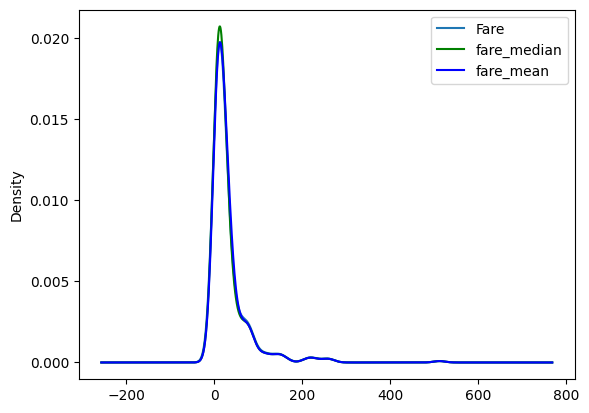

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['fare_median'].plot(kind='kde',ax=ax,color='green')
x_train['fare_mean'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [16]:
x_train.cov()

,Age,Fare,Family,age_median,age_mean,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.385048,16.476305
age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,55.023037,53.553455
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2324.238526,2340.091022


In [17]:
x_train.corr()

,Age,Fare,Family,age_median,age_mean,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205499,0.205942
age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089673,0.086982
age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.086078,0.083461
fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,0.996607,1.000000


<AxesSubplot: >

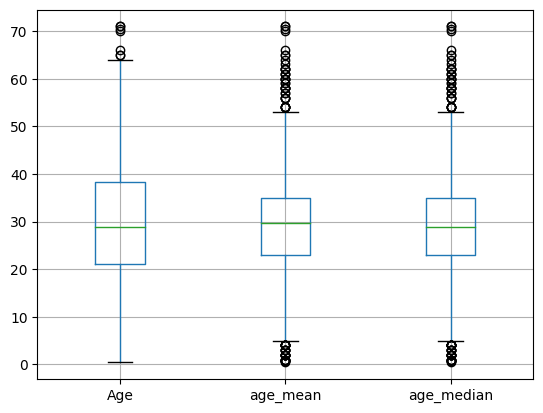

In [18]:
x_train[['Age','age_mean','age_median']].boxplot()

<AxesSubplot: >

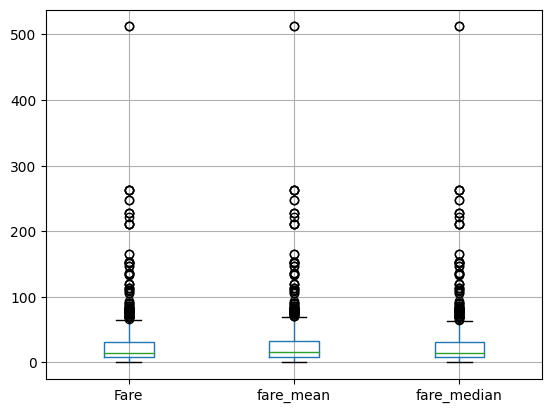

In [19]:
x_train[['Fare','fare_mean','fare_median']].boxplot()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [22]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [23]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [24]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [26]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [27]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices